In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
country_reservoir = pd.read_csv('/content/drive/My Drive/cmpe256-data/ReservoirSensor-County.csv',low_memory=False)
country_reservoir.head()

,Station,County
0,KLM,SISKIYOU
1,GBR,SISKIYOU
2,IRG,SISKIYOU
3,CLK,MODOC
4,DWN,SISKIYOU


In [5]:
outflow = pd.read_csv('/content/drive/My Drive/cmpe256-data/outflow2.csv',low_memory=False)
outflow.head()

,Sensor,Date,Value
0,BER,200501,51.533333
1,BER,200502,53.166667
2,BER,200503,638.333333
3,BER,200504,684.700000
4,BER,200505,540.000000


In [6]:
outflow.head()

,Sensor,Date,Value
0,BER,200501,51.533333
1,BER,200502,53.166667
2,BER,200503,638.333333
3,BER,200504,684.700000
4,BER,200505,540.000000


In [0]:
outflow['DateTime'] = pd.to_datetime(outflow['Date'],format='%Y%m')
outflow['Year'] = pd.to_datetime(outflow['Date'],format='%Y%m').dt.year
outflow['Month'] = pd.to_datetime(outflow['Date'],format='%Y%m').dt.month
#outflow.set_index('DateTime',inplace=True)

In [8]:
country_reservoir.Station.unique()

array(['KLM ', 'GBR ', 'IRG ', 'CLK ', 'DWN ', 'CLE ', 'LEW ', 'RTD ',
       'PLL ', 'MNC ', 'WRS ', 'SLJ ', 'NCA ', 'KNT ', 'BMP ', 'LGT ',
       'APN ', 'HNN ', 'BIO ', 'USL ', 'CHB ', 'DLV ', 'SAT ', 'CVE ',
       'AST ', 'LNG ', 'LRA ', 'CYC ', 'CRY ', 'SPB ', 'LFY ', 'SNN ',
       'ATN ', 'WHR ', 'SLN ', 'NCM ', 'TWT ', 'CCH ', 'GBL ', 'MAT ',
       'CSI ', 'PYM ', 'BQC ', 'CAS ', 'PRU ', 'CGS ', 'SGB ', 'MHW ',
       'PRR ', 'HMT ', 'BRV ', 'SVO ', 'VLP ', 'SGC ', 'RLC ', 'DMV ',
       'VIL ', 'STD ', 'HDG ', 'SKN ', 'HNS ', 'CUY ', 'SVT ', 'MMR ',
       'ELC ', 'JNN ', 'MRR ', 'MOR ', 'BRT ', 'LVD ', 'SW3 ', 'LOT ',
       'SHA ', 'KES ', 'WHI ', 'MCO ', 'IRC ', 'BIT ', 'PT7 ', 'PT6 ',
       'BLB ', 'STG ', 'EPK ', 'MMW ', 'ALM ', 'ANT ', 'BTV ', 'BCL ',
       'DAV ', 'FRD ', 'LGV ', 'SLC ', 'ORO ', 'THD ', 'TFR ', 'TMT ',
       'TAB ', 'BUL ', 'RLL ', 'CFW ', 'LVY ', 'FMD ', 'HHL ', 'LON ',
       'EDN ', 'UNV ', 'ICH ', 'SLB ', 'CPL ', 'FOL ', 'SIV ', 'NAT ',
      

In [9]:
country_reservoir['Station'] = country_reservoir['Station'].apply(lambda x: x.strip())
merged_outflow = pd.merge(outflow,country_reservoir,how='inner', left_on='Sensor', right_on='Station')
merged_outflow.head()

,Sensor,Date,Value,DateTime,Year,Month,Station,County
0,BER,200501,51.533333,2005-01-01,2005,1,BER,NAPA
1,BER,200502,53.166667,2005-02-01,2005,2,BER,NAPA
2,BER,200503,638.333333,2005-03-01,2005,3,BER,NAPA
3,BER,200504,684.700000,2005-04-01,2005,4,BER,NAPA
4,BER,200505,540.000000,2005-05-01,2005,5,BER,NAPA


In [10]:
merged_outflow['PortableWaterInGallons'] = merged_outflow['Value'].apply(lambda x:  x* 748)
merged_outflow.head()

,Sensor,Date,Value,DateTime,Year,Month,Station,County,PortableWaterInGallons
0,BER,200501,51.533333,2005-01-01,2005,1,BER,NAPA,38546.933331
1,BER,200502,53.166667,2005-02-01,2005,2,BER,NAPA,39768.666669
2,BER,200503,638.333333,2005-03-01,2005,3,BER,NAPA,477473.333308
3,BER,200504,684.700000,2005-04-01,2005,4,BER,NAPA,512155.600000
4,BER,200505,540.000000,2005-05-01,2005,5,BER,NAPA,403920.000000


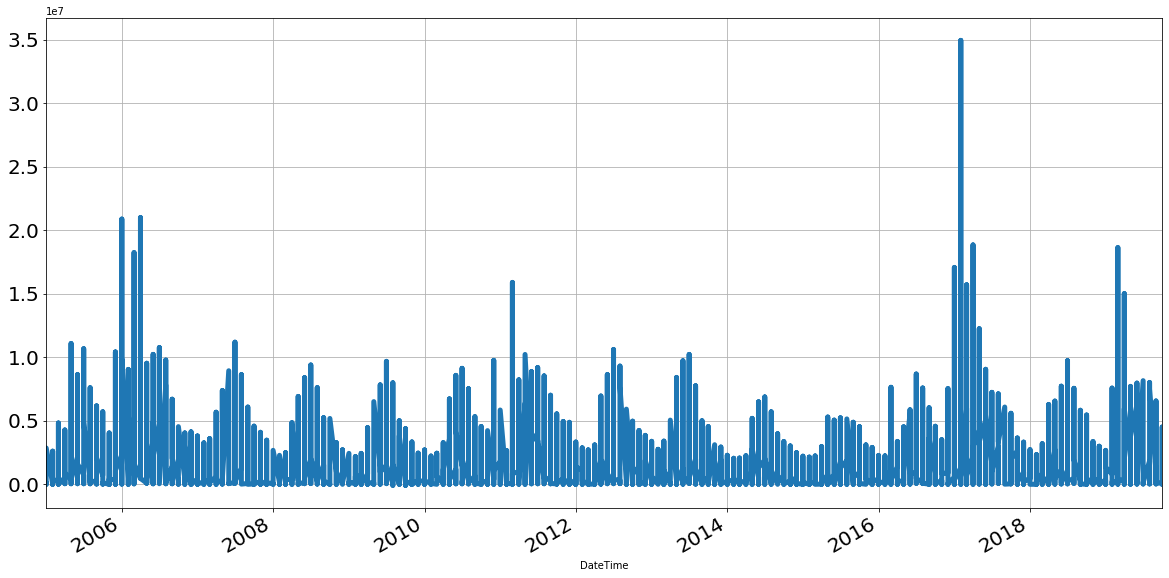

In [11]:
merged_outflow.set_index('DateTime',inplace=True)
merged_outflow['PortableWaterInGallons'].plot(figsize=(20,10), linewidth=5, fontsize=20, grid=True)

In [12]:
merged_outflow.head()

,Sensor,Date,Value,Year,Month,Station,County,PortableWaterInGallons
DateTime,,,,,,,,
2005-01-01,BER,200501,51.533333,2005,1,BER,NAPA,38546.933331
2005-02-01,BER,200502,53.166667,2005,2,BER,NAPA,39768.666669
2005-03-01,BER,200503,638.333333,2005,3,BER,NAPA,477473.333308
2005-04-01,BER,200504,684.700000,2005,4,BER,NAPA,512155.600000
2005-05-01,BER,200505,540.000000,2005,5,BER,NAPA,403920.000000


In [0]:
merged_outflow['County']= merged_outflow['County'].apply(lambda x:x.strip().lower())


In [14]:
merged_outflow_filtered = merged_outflow.groupby(['Year','Month','County'])['Value'].sum().reset_index()
merged_outflow_filtered.head()

,Year,Month,County,Value
0,2005,1,butte,2191.100000
1,2005,1,calaveras,1488.366667
2,2005,1,fresno,866.100000
3,2005,1,kern,522.333333
4,2005,1,lake,9.333333


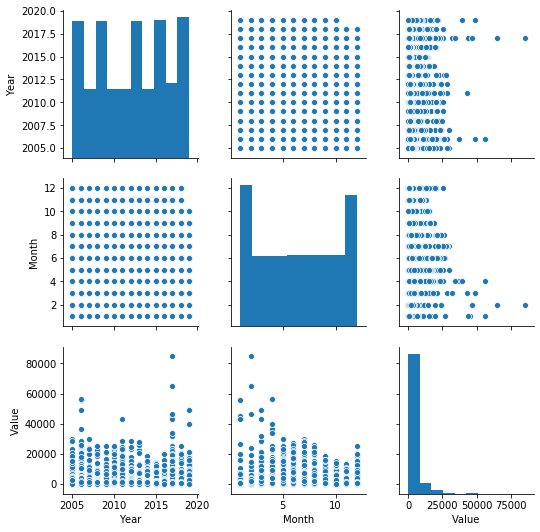

In [15]:
sns.pairplot(merged_outflow_filtered)

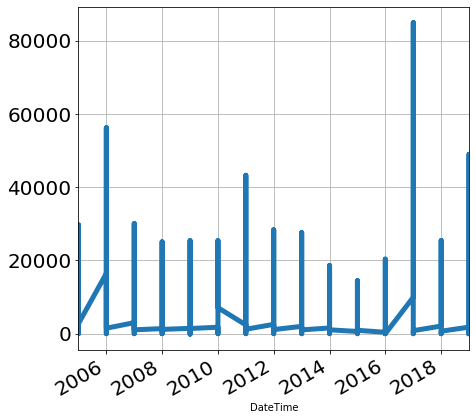

In [21]:
merged_outflow_filtered['DateTime'] = pd.to_datetime(merged_outflow_filtered['Year'],format='%Y')
merged_outflow_filtered.set_index('DateTime',inplace=True)
merged_outflow_filtered['Value'].plot(figsize=(7,7), linewidth=5, fontsize=20, grid=True)


In [22]:
merged_outflow_filtered['Value'] = merged_outflow_filtered['Value'].round(2)
merged_outflow_filtered.head()

,Year,Month,County,Value
DateTime,,,,
2005-01-01,2005,1,butte,2191.10
2005-01-01,2005,1,calaveras,1488.37
2005-01-01,2005,1,fresno,866.10
2005-01-01,2005,1,kern,522.33
2005-01-01,2005,1,lake,9.33


In [23]:
merged_outflow_filtered['CountyCodes'] = merged_outflow_filtered['County'].astype('category').cat.codes 
merged_outflow_filtered.head(2)

,Year,Month,County,Value,CountyCodes
DateTime,,,,,
2005-01-01,2005,1,butte,2191.10,0
2005-01-01,2005,1,calaveras,1488.37,1


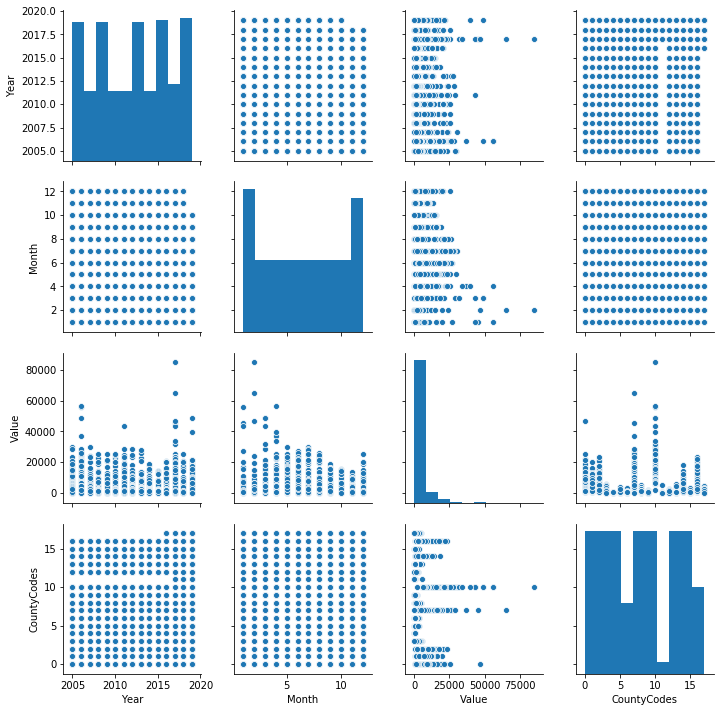

In [24]:
sns.pairplot(merged_outflow_filtered)

In [25]:
cols = ['Month','Value','Year','CountyCodes']
merged_outflow_filtered1 = merged_outflow_filtered[cols]
merged_outflow_filtered1 = merged_outflow_filtered1[merged_outflow_filtered1['Year'] > 2014]
merged_outflow_filtered1.head(2)

,Month,Value,Year,CountyCodes
DateTime,,,,
2015-01-01,1,609.53,2015,0
2015-01-01,1,920.43,2015,1


In [0]:
from sklearn.model_selection import train_test_split
trainData, testData = train_test_split(merged_outflow_filtered1, train_size=0.7, random_state=100)

In [0]:
Y_trainData = trainData['Value']
X_trainData = trainData.drop('Value', axis=1)



In [0]:
X_trainData.head()

In [0]:
Y_testData = testData['Value']
X_testData= testData.drop('Value', axis =1, index=None )

Y_testData = Y_testData.round(2)

In [0]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
clf.fit(X_trainData, Y_trainData)
predictions = clf.predict(X_testData)

In [0]:
import numpy as np
y_train1 = np.asarray(Y_trainData, dtype="int")
y_test1 = np.asarray(Y_testData, dtype="int")

In [0]:
Y_testData.shape

In [0]:
Y_testData

In [44]:
clf.score(X_trainData, Y_trainData)

0.02635728535225057

In [45]:
clf.score(X_testData, Y_testData)

0.027862326887767797

In [31]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_trainData,y_train1)
#y_pred=clf.predict(X_testData)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = clf.predict(X_testData)

In [32]:
clf.score(X_trainData,y_train1)

1.0

In [34]:
clf.score(X_testData, y_test1) *100

1.006711409395973

In [0]:
y_pred

In [35]:
y_test1

array([ 2682,    55,  4462,  6487, 21153,    22,   110,  1165,  2381,
          91,    10,  2708,  1436,  1095,   511,   272,    17,   395,
         404,    86,   237,  1983,  5045,    36,   456,   452,  8087,
          86,  1396, 19591, 11612,  6554,   152,  2125,    90,   664,
         392,    87,   395,   475,  3664,  8163,    78,   134,  1045,
         613,    14,   250,   100,  9049,  1172,    27,   202,    12,
         900,  2331,  7372,   595,  5283,  2565,    77,  1409,    49,
        8535,     1,  1232,     0,   561,   226,  8743,   275,   491,
        4843,   360,  9506,  6059,  2430,   515,   156,   320,   128,
       16775,    23,   229,    12,     9, 10629,  7688,   845,   220,
        1679,  2195,     0,  9790,   102,   443, 12676,  3329,   794,
         775,     7,   121,   343,  5428,    25,   818,  3136,  1074,
         214,  3431,  1385,    76,    80,   185,  1768,  4392,   103,
           8, 13275,     0,  9032,  3495,    30,   128,   664,    33,
           0,   100,

In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_trainData,y_train1)
y_pred = clf.predict(X_testData)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [37]:
clf.score(X_trainData,y_train1)

0.03597122302158273

In [38]:
clf.score(X_testData,y_test1)

0.016778523489932886